In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helpers as helper

In [2]:
file_path = '../../data/processed/locations_visited.csv'

In [3]:
data = pd.read_csv(file_path)

In [4]:
data

,id,tour_id,itinerary_id,name,countryCode,longitude,latitude,created_at,updated_at
0,1,tour-c6876018-bc87-49e4-9e6b-dbe099ad2a77,1,Hanoi,VN,105.699772,20.998488,2023-09-25 11:50:18,2023-09-25 11:50:18
1,2,tour-c6876018-bc87-49e4-9e6b-dbe099ad2a77,2,Hanoi,VN,105.699772,20.998488,2023-09-25 11:50:18,2023-09-25 11:50:18
2,3,tour-c6876018-bc87-49e4-9e6b-dbe099ad2a77,2,Ha Long Bay,VN,107.051479,20.824062,2023-09-25 11:50:18,2023-09-25 11:50:18
3,4,tour-c6876018-bc87-49e4-9e6b-dbe099ad2a77,3,Hanoi,VN,105.699772,20.998488,2023-09-25 11:50:18,2023-09-25 11:50:18
4,5,tour-c6876018-bc87-49e4-9e6b-dbe099ad2a77,4,Ho Chi Minh City,VN,106.713355,10.743635,2023-09-25 11:50:18,2023-09-25 11:50:18
...,...,...,...,...,...,...,...,...,...
16560,16561,tour-171df543-de65-4733-b863-c7a3cfae7b45,8934,Salzburg,AT,13.046118,47.797631,2023-09-25 11:50:27,2023-09-25 11:50:27
16561,16562,tour-171df543-de65-4733-b863-c7a3cfae7b45,8935,Berlin,DE,13.236281,52.436959,2023-09-25 11:50:27,2023-09-25 11:50:27
16562,16563,tour-171df543-de65-4733-b863-c7a3cfae7b45,8936,Innsbruck,AT,11.380083,47.289626,2023-09-25 11:50:27,2023-09-25 11:50:27
16563,16564,tour-171df543-de65-4733-b863-c7a3cfae7b45,8936,Salzburg,AT,13.046118,47.797631,2023-09-25 11:50:27,2023-09-25 11:50:27


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16565 entries, 0 to 16564
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16565 non-null  int64  
 1   tour_id       16565 non-null  object 
 2   itinerary_id  16565 non-null  int64  
 3   name          16565 non-null  object 
 4   countryCode   16523 non-null  object 
 5   longitude     16409 non-null  float64
 6   latitude      16409 non-null  float64
 7   created_at    16565 non-null  object 
 8   updated_at    16565 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [6]:
data.describe(include=[float, int]).T

,count,mean,std,min,25%,50%,75%,max
id,16565.0,8283.000000,4782.047940,1.000000,4142.000000,8283.000000,12424.000000,16565.00000
itinerary_id,16565.0,4559.782976,2562.964810,1.000000,2309.000000,4654.000000,6772.000000,8937.00000
longitude,16409.0,2.210885,60.761347,-159.671252,-7.119849,8.694351,21.068046,177.09172
latitude,16409.0,34.343165,23.357781,-54.832560,31.451050,41.834247,47.797631,71.17068


**Observations:**

**longitude and latitude:** are missing valies for some raws.

In [16]:
data.select_dtypes(include=['object']).columns.tolist()

['tour_id', 'name', 'countryCode', 'created_at', 'updated_at']

In [10]:
data['countryCode'].value_counts()

countryCode
IT    2054
US    1584
ES    1233
GB    1061
IE     676
      ... 
LA       6
SZ       4
BW       4
LS       2
ZM       1
Name: count, Length: 84, dtype: int64

In [24]:
data['name'].value_counts()

name
Rome                                       466
Venice                                     346
Florence                                   311
Paris                                      256
Madrid                                     252
                                          ... 
Great Sand Dunes National Park Preserve      1
Ouray                                        1
Silverton                                    1
Colorado National Monument                   1
Franschhoek                                  1
Name: count, Length: 1529, dtype: int64

**Decisions:**
- 'id': remove
- 'tour_id': remove
- 'itinerary_id': remove
- 'name': keep for NLP 
- 'countryCode': keep 
- 'longitude': keep
- 'latitude': keep 
- 'created_at': remove
- 'updated_at': remove


<Axes: >

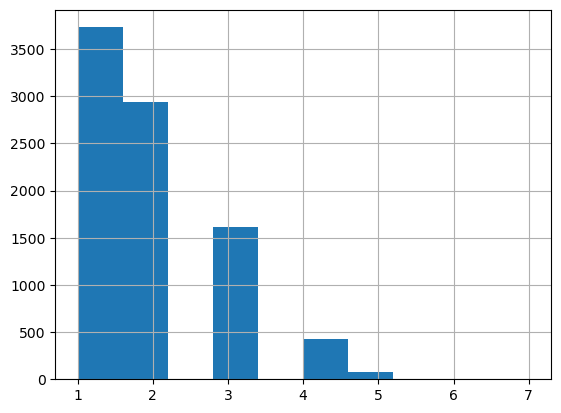

In [19]:
data['itinerary_id'].value_counts().hist()

The plot above shows the distribution of number of locations visited in a day. 

<Axes: >

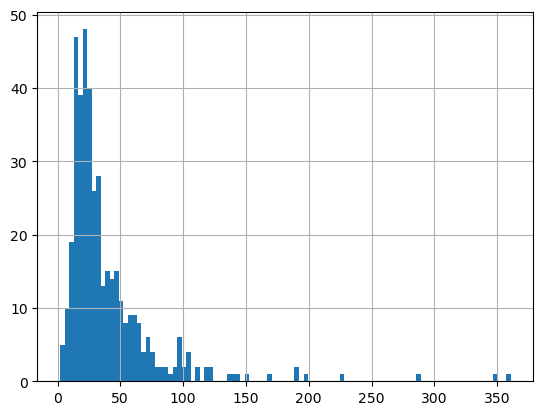

In [22]:
data['tour_id'].value_counts().hist(bins = 100)

The plot above shows the distribution of number of locations visited per tour.

In [27]:
value_counts = data['name'].value_counts()

In [28]:
(value_counts > 1).sum(), (value_counts > 2).sum(), (value_counts > 3).sum(), (value_counts > 5).sum(), (value_counts > 10).sum(), (value_counts > 15).sum(), (value_counts > 20).sum()

(1252, 958, 814, 597, 347, 255, 195)